# **Decision Tree Regression in R**

## **Importing the dataset**

In [1]:
ds = read.csv('/content/Position_Salaries.csv')
cat("First three rows of dataset", "\n")
head(ds, 3)

First three rows of dataset 


,Position,Level,Salary
,<chr>,<int>,<int>
1,Business Analyst,1,45000
2,Junior Consultant,2,50000
3,Senior Consultant,3,60000


## **Splitting the dataset into the Train set and Test set**

In [2]:
ds = ds[2:3]

In [3]:
install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(ds$Salary, SplitRatio = 9/10)
split

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [4]:
train_set = subset(ds, split == TRUE)
test_set = subset(ds, split == FALSE)
print(head(train_set,3))

  Level Salary
1     1  45000
2     2  50000
3     3  60000


In [5]:
print(head(test_set,3))

  Level Salary
5     5 110000


## **Fitting Decision Tree Regression to the dataset**

In [6]:
install.packages('rpart')
library(rpart)
regressor = rpart(formula = Salary ~., data = train_set)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Predicting a new result**

In [7]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

[1] 265000

## **Predicting the Test set result**

In [8]:
y_pred = predict(regressor, newdata = test_set)
y_pred

[1] 265000

## **Visualizing the Support Vector Regression results**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



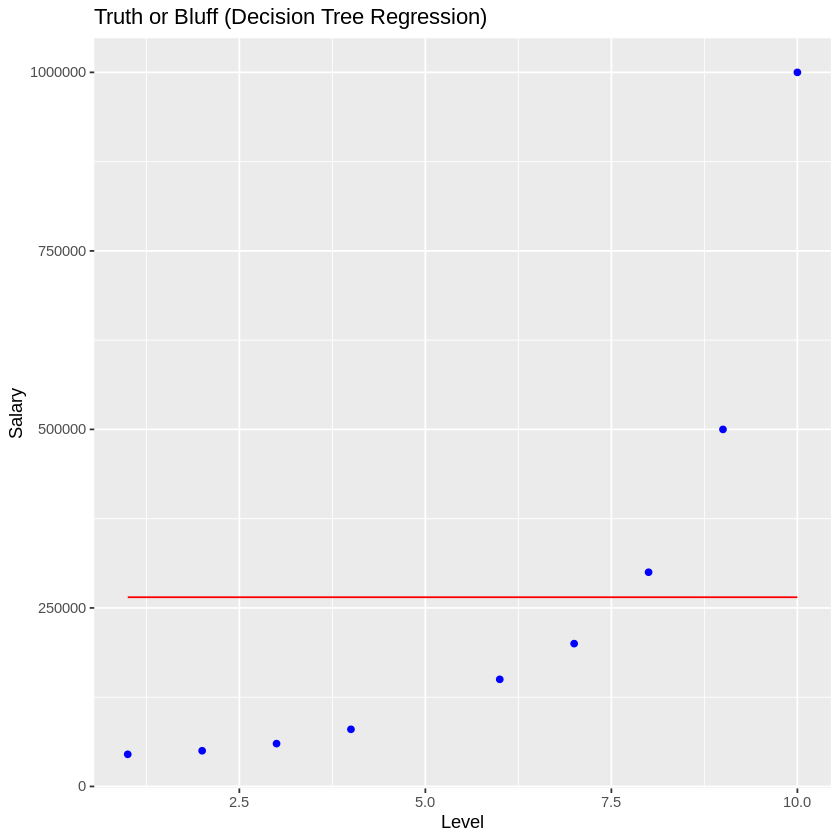

In [9]:
install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'blue') +
  geom_line(aes(x = train_set$Level, y = predict(regressor, newdata =  train_set)),
            colour = 'red') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

## **Changing minimum split control of the regressor from the default value of 20000 to 1**

In [10]:
regressor = rpart(formula = Salary ~ .,
                  data = ds,
                  control = rpart.control(minsplit = 1))

In [11]:
y_pred = predict(regressor, data.frame(Level = 6.5))
y_pred

1 
250000

In [12]:
y_pred = predict(regressor, newdata = test_set)
y_pred

5 
82500

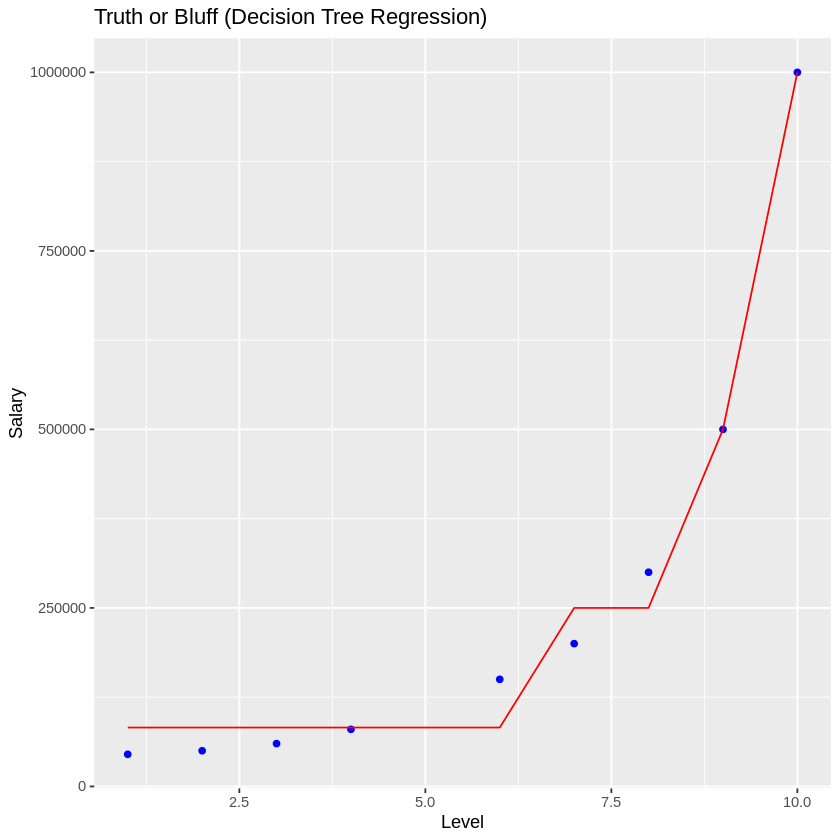

In [13]:
# install.packages('ggplot2')
library(ggplot2)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'blue') +
  geom_line(aes(x = train_set$Level, y = predict(regressor, newdata =  train_set)),
            colour = 'red') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

## Decision Tree**Visualizing the Decision Tree Regression Model results (for higher resolution and smoother curve)**

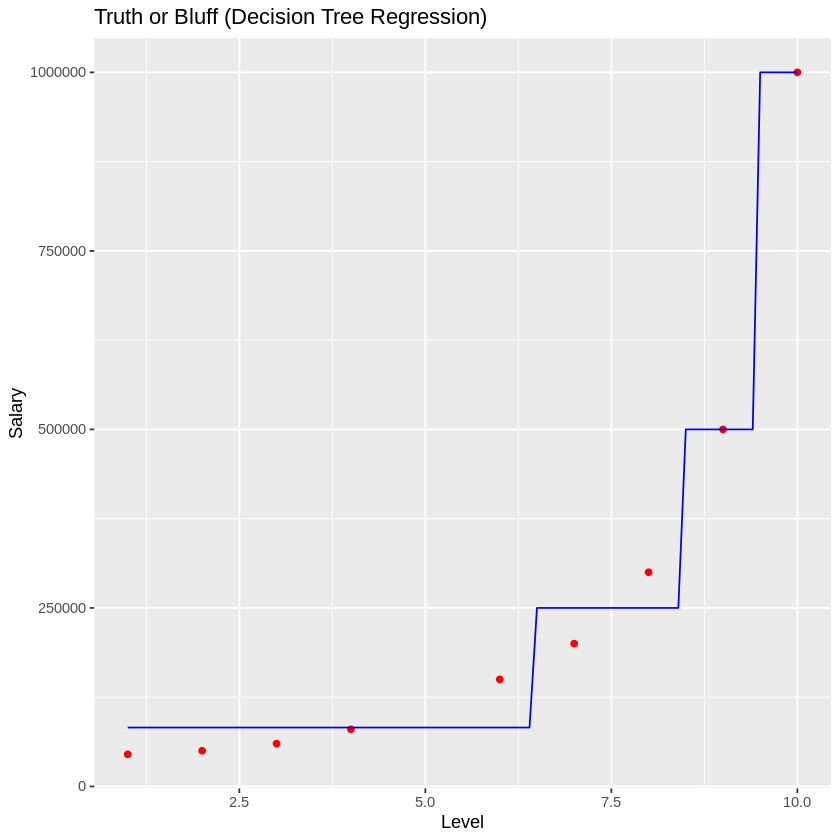

In [14]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(train_set$Level), max(train_set$Level), 0.1)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor,newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

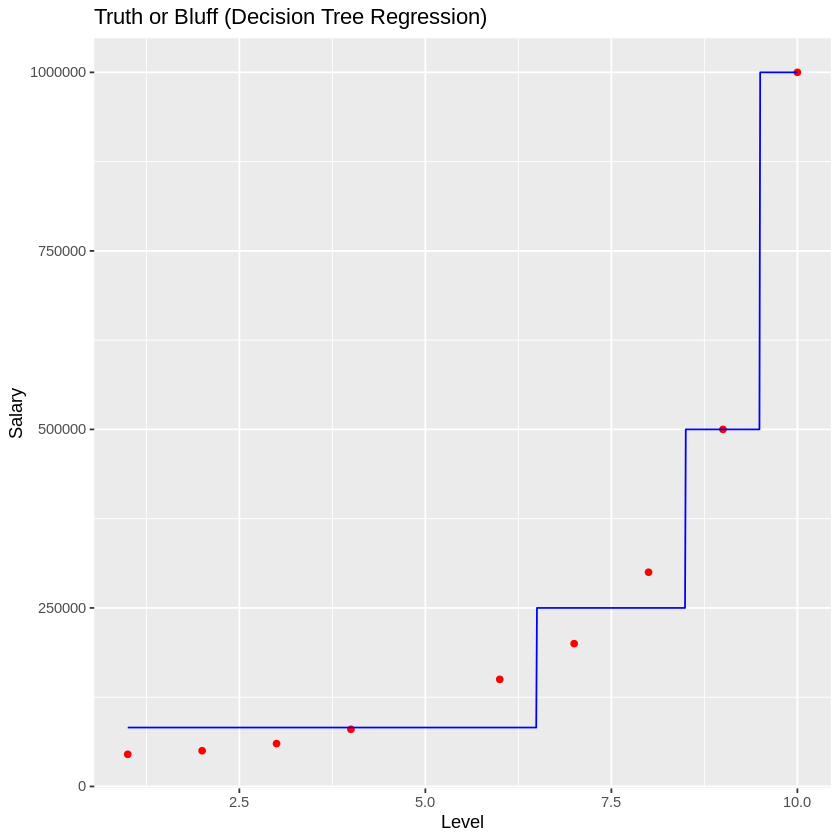

In [15]:
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(train_set$Level), max(train_set$Level), 0.01)
ggplot() +
  geom_point(aes(x = train_set$Level, y = train_set$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor,newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Decision Tree Regression)') +
  xlab('Level') +
  ylab('Salary')

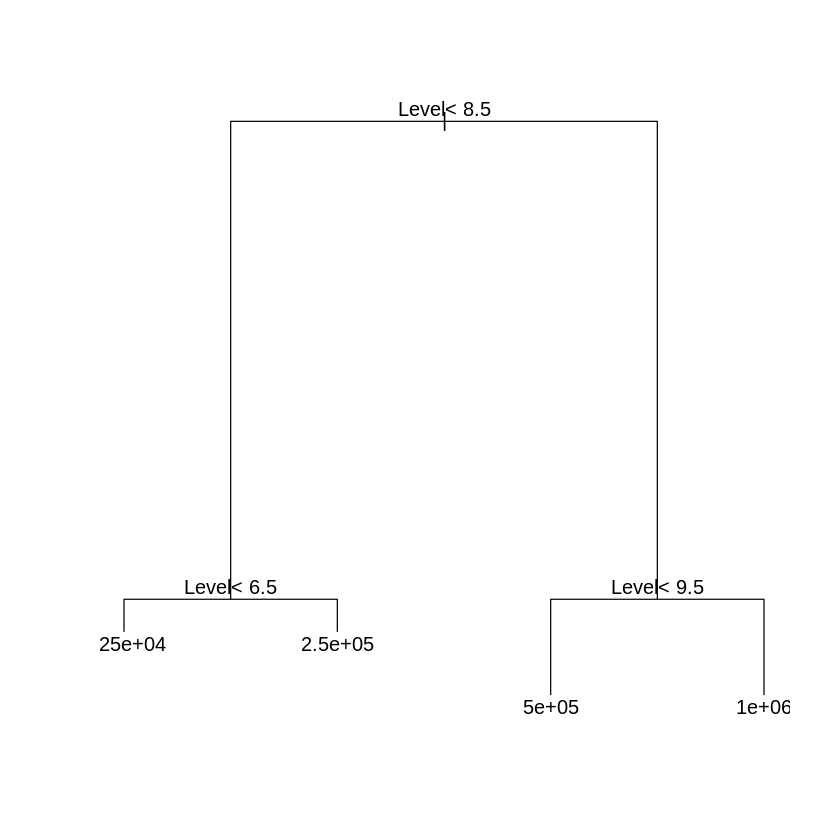

In [16]:
# Plotting the tree
plot(regressor)
text(regressor)